# Aim of this project is to Predict property price in the city of  Bengalore

# I have import couple of useful libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

# here i have load my dataset 
# you can download this Data set  from kaggle


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

Here i want to know different area and how many times

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df = df.replace({'area_type':{
    "Built-up  Area":1,
    "Carpet  Area":2,
    "Plot  Area":3,
    "Super built-up  Area":4
}})
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,1,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,1,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,4,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,1,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,4,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# here i am droping some certain columns 

In [6]:
df1 = df.drop(['availability','society','balcony'],axis=1)

# Now begin the Data Cleaning process

isnull will tell you how many null values does your Dataframe contains and sum will tell you how many

In [7]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# My dataset is large enough so i can drop all NaN values 
# other approach is other can do take median or mean and  can use fillna  function

In [8]:
df2 = df1.dropna()
df2.isnull().sum() # 

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2.shape

(13246, 6)

In [10]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# feature Engineering

# i want the starting token value of column  Size and i want to drop the remaining part

In [11]:
df2['bhk'] = df2['size'].apply(lambda x :int(x.split(" ")[0]))

C:\Users\karti\AppData\Local\Temp/ipykernel_14012/1873886877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x :int(x.split(" ")[0]))


In [12]:
df2.head().drop("size",axis=1)

,area_type,location,total_sqft,bath,price,bhk
0,4,Electronic City Phase II,1056,2.0,39.07,2
1,3,Chikka Tirupathi,2600,5.0,120.00,4
2,1,Uttarahalli,1440,2.0,62.00,3
3,4,Lingadheeranahalli,1521,3.0,95.00,3
4,4,Kothanur,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.bhk>20] # This seem like an outlier 

,area_type,location,size,total_sqft,bath,price,bhk
1718,4,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,3,Munnekollal,43 Bedroom,2400,40.0,660.0,43


# Explore total_sqft feature

In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

while Exploreing tot total_sqft i found that some values are in the ranging value

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

is_float will return a value which is valid float number 

BUt i want to see how many values are in ranging value

In [17]:
df2[~df2["total_sqft"].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,4,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,4,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,4,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,4,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,4,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,4,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,4,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,1,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,4,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,1,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def covert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

what this function will do  it will take two numbers split it then it will take the number and do average value

In [19]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(covert_sqft_to_num)
df3.head(10)

,area_type,location,size,total_sqft,bath,price,bhk
0,4,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,3,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,4,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,4,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,4,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,4,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,4,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,3,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [20]:
df3.tail(10)

,area_type,location,size,total_sqft,bath,price,bhk
13310,4,Rachenahalli,2 BHK,1050.0,2.0,52.71,2
13311,3,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.00,7
13312,4,Bellandur,2 BHK,1262.0,2.0,47.00,2
13313,4,Uttarahalli,3 BHK,1345.0,2.0,57.00,3
13314,4,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3
13315,1,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,4,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,1,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,4,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4
13319,4,Doddathoguru,1 BHK,550.0,1.0,17.00,1


In [21]:
df3.loc[30]

area_type             4
location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering

# in real state market PRICE of a area is per square fit 

In [22]:
df3["price_per_sqft"] = df3["price"]*100000/df3["total_sqft"]
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,4,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,3,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,4,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# location is catagical feature so its in string 
# so let us cheak of many unique location

In [23]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
# total number of unique location 
df3.location.nunique()

1304

In [25]:
# i want to cheak how many time a particular location come
df3.location = df3.location.apply(lambda x : x.strip()) # this will unnesscessary space in my location column
location_stats  = df3.groupby("location")["location"].agg("count")

In [26]:
location_stats.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats<=10]) # this will tell that how many location less then 10 times 

1052

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10] # this will give the location which less then ten value in count
location_stats_less_than_10.tail(10)

location
sankeswari              1
sapthagiri Layout       1
sarjapura main road     1
singapura paradise      1
south                   2
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, dtype: int64

In [29]:
df3.location = df3.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x) # this will give me that location which is great then 10 
# why we done so because in one hot encoding if we don't remove these location our features will be to much that why we done so 
df3.location.nunique()

242

# Outlier Deduction 

In real world Scenario may be your normally square ft per bedroom is 300.

2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [30]:
df3

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,4,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,3,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,4,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,1,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,4,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,1,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,4,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [31]:
df3.shape

(13246, 8)

In [32]:
# now we removing that bhk which has less the 300 per sqft fit
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
# now see the shape u might see that rows value will change
# and these remove rows are called out liears
df4

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,4,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,3,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,4,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,1,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,4,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,1,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,4,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [33]:
df4.shape

(12502, 8)

In [34]:
df4.price_per_sqft.describe()
# describe method gives statistics about paticular column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# Outlier Removal Using Standard Deviation and Mean

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

In [36]:
df5 = remove_pps_outliers(df4)
df5.shape

(10241, 8)

# let's check if for given location how does the 2  bhk and 3 Bhk property prices look like

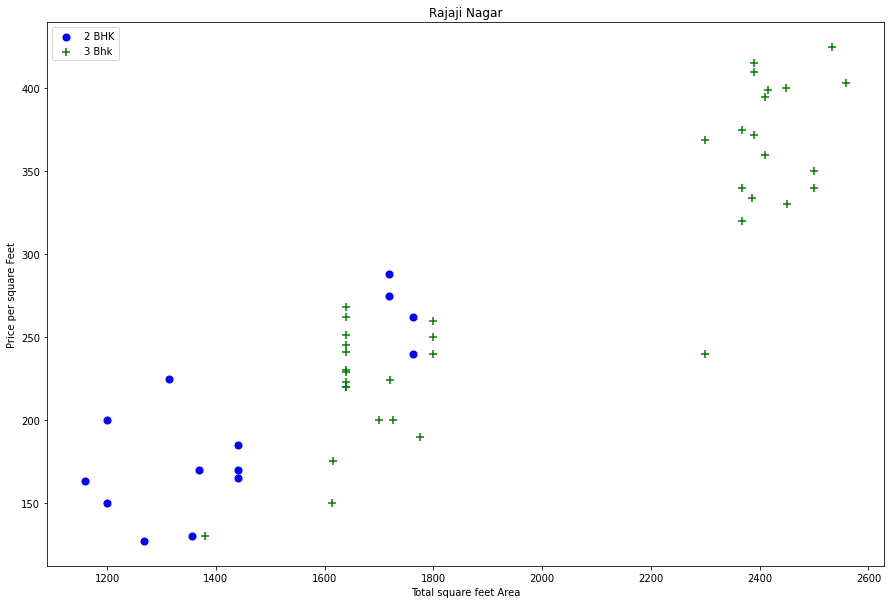

In [37]:
%matplotlib inline
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = "Blue",label = "2 BHK",s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = "+",color="green",label = "3 Bhk",s =50)
    plt.xlabel("Total square feet Area")
    plt.ylabel("Price per square Feet")
    plt.title(location)
    plt.legend()


plot_scatter_chart(df5,"Rajaji Nagar")

# we should also remove properties where for same location , the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area)
# Now we can remove those 2 bhk apartments whose price_per_sqft is less than mean price_per_sqft of 1 bhk apartment

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location ,location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk ,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean":np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

In [39]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7329, 8)

In [40]:
df6

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,4,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,4,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10232,2,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,4,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,4,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,3,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


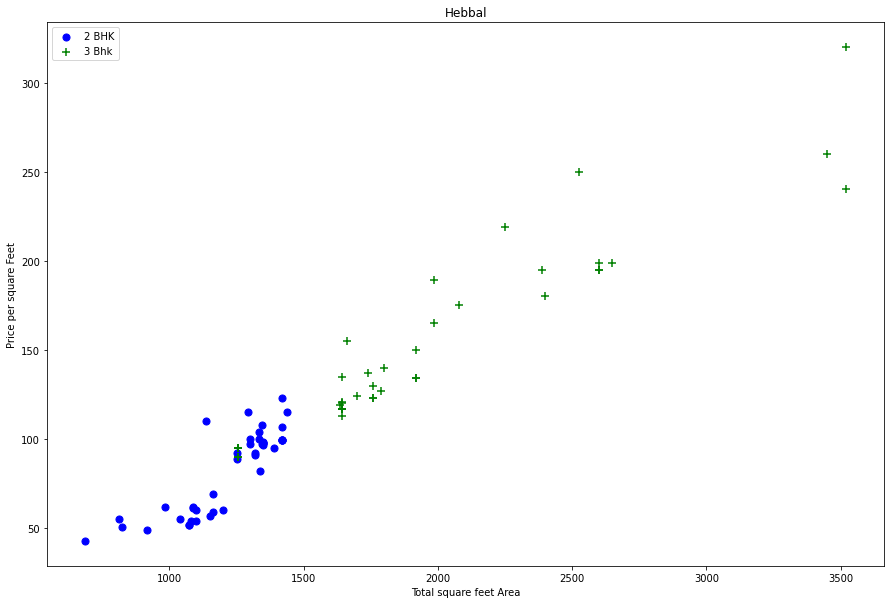

In [41]:
# now again we plot the graph to cheack that 2 bhk price are higher or not then 3 bhk
plot_scatter_chart(df6,"Hebbal")
# now u can see that most of the blue dot lies below the greeen one it mean our 3 bhk price is hiher then 2 bhk 

#  now i want to plot a histogram to see price per square feet

Text(0, 0.5, 'Count')

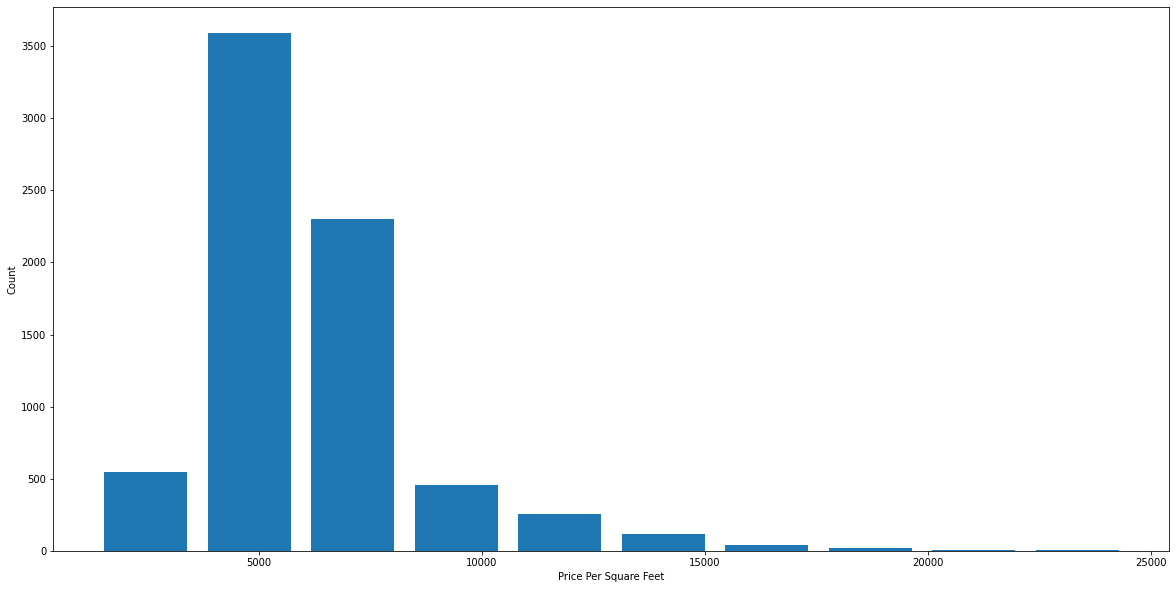

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df6[df6.bath>10] # this tell you that how many homes have bath room greater then 10

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,4,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,4,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,4,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,4,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,4,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [45]:
df7 = df6[df6.bath<df6.bhk+2] # df6[df6.bath<df6.bhk+2] of these are outlier
df7.shape

(7251, 8)

In [46]:
df7

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,4,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,4,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10232,2,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,4,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,4,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,3,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


# Now my dataset is pretty much cleaned 
# let make ready for machine learning

In [47]:
df8 = df7.drop(["price_per_sqft","size" ],axis=1)

# Use One Hot Encoding For Location

In [48]:
dumies = pd.get_dummies(df8.location)
dumies = dumies.drop(["other"] ,axis=1)


In [49]:
df9 = pd.concat([df8,dumies],axis="columns")

In [50]:
df10 = df9.drop(['location',"area_type"],axis=1)

In [51]:
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x = df10.drop('price',axis=1) # here we drop price because it was dependent variable

In [53]:
y = df10.price


# now we split our Dataset into train and test

In [54]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Here is have import Linear Regression algorithm from sklearn 

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

# Next step is to  Elevate score of the model it's tells how good model is

In [66]:
model.score(x_test,y_test)

0.8746160116851491

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


# Here i want to try some more model to see which algorithm works well 

# one of technique is "Grid search CV" it will tell  you which model is performing best

In [57]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos =  {
        "Linear_Regression" :{
            "model1": LinearRegression(),
            "params":{
                "normalize":[True,False]

            }
        },
        "lasso":{
            "model1":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model1":DecisionTreeRegressor(),
            "params":{
                "criterion" : ["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        },
        "RandomForestRegressor":{
            "model1":RandomForestRegressor(),
            "params" :{
                "n_estimators":[20,50,60]
                        
        
        }
        }

    }
    from sklearn.model_selection import GridSearchCV
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
    for algo_name ,config in algos.items():
        gs = GridSearchCV(config["model1"],config["params"],cv =cv ,return_train_score=False)
        gs.fit(x,y)
        scores.append({
        "model1":algo_name,
        "best_score":gs.best_score_,
        "best_params":gs.best_params_
    })
    return pd.DataFrame(scores,columns=["model1","best_score","best_params"])

In [58]:
find_best_model_using_gridsearchcv(x,y)

,model1,best_score,best_params
0,Linear_Regression,0.846212,{'normalize': False}
1,lasso,0.707131,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.694196,"{'criterion': 'mse', 'splitter': 'random'}"
3,RandomForestRegressor,0.794068,{'n_estimators': 20}


# Here we  see  can clearly that Linear Regression preforming well 

In [59]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [74]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns == location)
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index != 0:
        X[loc_index] = 1
    return model.predict([X])[0]

# Prediction

In [75]:
predict_price("1th Phase JP Nagar'",1000,2,2)

78.93008793915263

In [69]:
predict_price("Indira Nagar",1000,2,2)

151.47196040226405

# now we  will be pickel the model use it in website

In [64]:
import pickle
with open("Banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(model,f)

# here this json will contain the columns information which is actually a location column

In [65]:
import json 
columns = {
    "data_columns" : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))